---

#  tlines issue425


---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
import mplfinance as mpf
mpf.__version__

'0.12.7a18'

In [3]:
import yfinance as yf

In [4]:
tickername = "AAPL"
Ticker = yf.Ticker(tickername)
df = Ticker.history(period='1d', interval='1m', start='2021-08-02', end='2021-08-04')

In [5]:
df.index = pd.DatetimeIndex(df.index.tz_localize(None).to_pydatetime())
df = df[['Open','High','Low','Close','Volume']]

In [6]:
df

,Open,High,Low,Close,Volume
2021-08-02 09:30:00,146.360001,146.949997,146.330002,146.470001,2281385
2021-08-02 09:31:00,146.490005,146.820007,146.440002,146.615005,423278
2021-08-02 09:32:00,146.615005,146.619904,146.169998,146.289993,421220
2021-08-02 09:33:00,146.289993,146.399994,146.089996,146.345703,410815
2021-08-02 09:34:00,146.339996,146.470001,146.190002,146.419998,393832
...,...,...,...,...,...
2021-08-03 15:55:00,147.300003,147.369995,147.270996,147.289993,249385
2021-08-03 15:56:00,147.300003,147.429993,147.279999,147.389999,481793
2021-08-03 15:57:00,147.389999,147.449997,147.360001,147.427505,306086
2021-08-03 15:58:00,147.419998,147.427200,147.139999,147.330002,396355


In [7]:
df = df.resample('5T').agg(
    {'Open'  :'first',
     'High'  :'max',
     'Low'   :'min',
     'Close' :'last',
     'Volume':'sum'
    }).dropna()

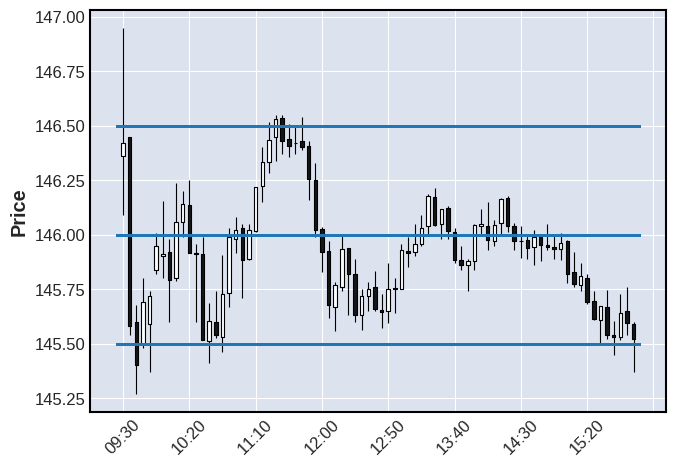

In [8]:
hlines = [146.5,146.0,145.5]
fig, axlist = mpf.plot(df.loc['2021-08-02'],type='candle',returnfig=True,hlines=hlines)

In [9]:
x = len(df.loc['2021-08-02']) + 1
for y in hlines:
    axlist[0].annotate(str(y),(x,y))

Text(79, 146.5, '146.5')

Text(79, 146.0, '146.0')

Text(79, 145.5, '145.5')

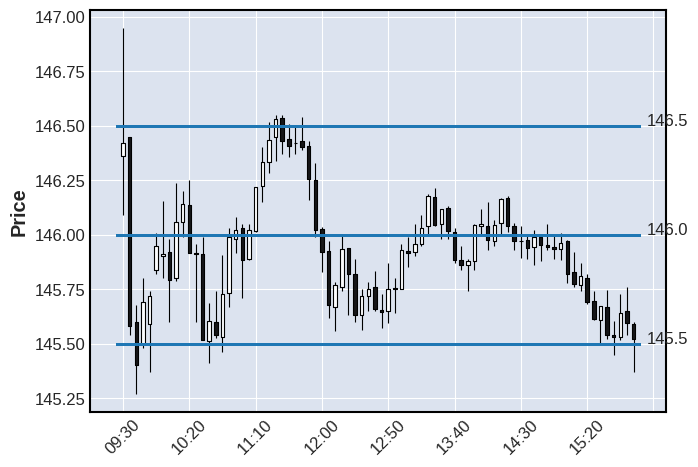

In [10]:
fig